In [1]:
import pandas as pd
import os
import glob
import numpy as np
import math
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn.metrics import r2_score

In [2]:
#combining no of csv file into one file with name combine_csv
os.chdir('D:\Final')
extension='csv'

all_filenames=[i for i in glob.glob('*.{}'.format(extension))]

combined_csv=pd.concat([pd.read_csv(f) for f in all_filenames])
df=combined_csv


In [3]:
df.drop(['AP1RSS','AP2RSS','AP3RSS'],axis=1,inplace=True)

In [4]:
dff=df.assign(Product_RTT=df['AP1RTT']*df['AP2RTT']*df['AP3RTT'],Product_RTT12=df['AP1RTT']*df['AP2RTT'],Product_RTT23=df['AP2RTT']*df['AP3RTT'],Product_RTT13=df['AP1RTT']*df['AP3RTT'],square_RTT1=df['AP1RTT']*df['AP1RTT'],square_RTT2=df['AP2RTT']*df['AP2RTT'],square_RTT3=df['AP3RTT']*df['AP3RTT'])


In [5]:


# Group the DataFrame by 'x' and 'y'
groups = dff.groupby(['x', 'y'])

# Split the groups into two separate dataframes
df1 = pd.concat([group.iloc[:len(group) // 2] for _, group in groups])
df2 = pd.concat([group.iloc[len(group) // 2:] for _, group in groups])


In [6]:
new_name={'AP1RTT':'AP1RTTA','AP1STDEV':'AP1STDEVA','AP2RTT':'AP2RTTA','AP2STDEV':'AP2STDEVA','AP3RTT':'AP3RTTA','AP3STDEV':'AP3STDEVA','Product_RTT':'Product_RTTA','Product_RTT12':'Product_RTT12A','Product_RTT13':'Product_RTT13A','square_RTT1':'square_RTT1A','square_RTT2':'square_RTT2A','square_RTT3':'square_RTT3A'}
df1.rename(columns=new_name,inplace=True)

In [7]:
new_name={'AP1RTT':'AP1RTTB','AP1STDEV':'AP1STDEVB','AP2RTT':'AP2RTTB','AP2STDEV':'AP2STDEVB','AP3RTT':'AP3RTTB','AP3STDEV':'AP3STDEVB','Product_RTT':'Product_RTTB','Product_RTT12':'Product_RTT12B','Product_RTT13':'Product_RTT13B','square_RTT1':'square_RTT1B','square_RTT2':'square_RTT2B','square_RTT3':'square_RTT3B'}
df2.rename(columns=new_name,inplace=True)

In [8]:
# group the data by x and y values, and calculate the mean of each group
groupedd1 = df1.groupby(['x', 'y']).mean()
groupedd2 = df2.groupby(['x', 'y']).mean()

In [9]:
import numpy as np
import pandas as pd

# Group the data by 'x' and 'y', and calculate the minimum, maximum, 25th, 50th, and 75th percentiles for each column for local feature extractions
grouped = df1.groupby(['x', 'y']).agg(['min', 'max', lambda x: np.percentile(x, q=25), lambda x: np.percentile(x, q=50), lambda x: np.percentile(x, q=75)])

# Add the mean or average value of each column to the grouped dataframe
grouped_mean = df1.groupby(['x', 'y']).mean()
grouped = pd.concat([grouped, grouped_mean], axis=1)

# Rename the columns and reset the index
grouped.columns = ['_'.join(col).strip() for col in grouped.columns.values]
grouped = grouped.reset_index()


In [10]:
import numpy as np
import pandas as pd

# Group the data by 'x' and 'y', and calculate the minimum, maximum, 25th, 50th, and 75th percentiles for each column for local feature extractions
groupedd = df2.groupby(['x', 'y']).agg(['min', 'max', lambda x: np.percentile(x, q=25), lambda x: np.percentile(x, q=50), lambda x: np.percentile(x, q=75)])

# Add the mean or average value of each column to the grouped dataframe
grouped_mean = df2.groupby(['x', 'y']).mean()
groupedd = pd.concat([groupedd, grouped_mean], axis=1)

# Rename the columns and reset the index
groupedd.columns = ['_'.join(col).strip() for col in groupedd.columns.values]
groupedd = groupedd.reset_index()

In [11]:
new_name={'AP1RTTA_<lambda_0>': 'AP1RTTA_25','AP2RTTA_<lambda_0>': 'AP2RTTA_25','AP3RTTA_<lambda_0>': 'AP3RTTA_25',
          'AP1RTTA_<lambda_1>': 'AP1RTTA_50','AP2RTTA_<lambda_1>': 'AP2RTTA_50','AP3RTTA_<lambda_1>': 'AP3RTTA_50',
          'AP1RTTA_<lambda_2>': 'AP1RTTA_75','AP2RTTA_<lambda_2>': 'AP2RTTA_75','AP3RTTA_<lambda_2>': 'AP3RTTA_75',
           
             
          'AP1STDEVA_<lambda_0>':'AP1STDEVA_25','AP2STDEVA_<lambda_0>':'AP2STDEVA_25','AP3STDEVA_<lambda_0>':'AP3STDEVA_25',
          'AP1STDEVA_<lambda_1>':'AP1STDEVA_50','AP2STDEVA_<lambda_1>':'AP2STDEVA_50','AP3STDEVA_<lambda_1>':'AP3STDEVA_50',
          'AP1STDEVA_<lambda_2>':'AP1STDEVA_75','AP2STDEVA_<lambda_2>':'AP2STDEVA_75','AP3STDEVA_<lambda_2>':'AP3STDEVA_75',
          'A_P_1_R_T_T_A':'AP1RTTA_MEAN','A_P_2_R_T_T_A':'AP2RTTA_MEAN','A_P_3_R_T_T_A_A':'AP3RTTA_MEAN',
          'A_P_1_S_T_D_E_V_A':'AP1STDEVA_MEAN','A_P_2_S_T_D_E_V_A':'AP1STDEVA_MEAN','A_P_3_S_T_D_E_V_A':'AP1STDEVA_MEAN'}
grouped.rename(columns=new_name,inplace=True)

In [12]:
new_name={'AP1RTTB_<lambda_0>': 'AP1RTTB_25','AP2RTTB_<lambda_0>': 'AP2RTTB_25','AP3RTTB_<lambda_0>': 'AP3RTTB_25',
          'AP1RTTB_<lambda_1>': 'AP1RTTB_50','AP2RTTB_<lambda_1>': 'AP2RTTB_50','AP3RTTB_<lambda_1>': 'AP3RTTB_50',
          'AP1RTTB_<lambda_2>': 'AP1RTTB_75','AP2RTTB_<lambda_2>': 'AP2RTTB_75','AP3RTTB_<lambda_2>': 'AP3RTTB_75',
           
             
          'AP1STDEVB_<lambda_0>':'AP1STDEVB_25','AP2STDEVB_<lambda_0>':'AP2STDEVB_25','AP3STDEVB_<lambda_0>':'AP3STDEVB_25',
          'AP1STDEVB_<lambda_1>':'AP1STDEVB_50','AP2STDEVB_<lambda_1>':'AP2STDEVB_50','AP3STDEVB_<lambda_1>':'AP3STDEVB_50',
          'AP1STDEVB_<lambda_2>':'AP1STDEVB_75','AP2STDEVB_<lambda_2>':'AP2STDEVB_75','AP3STDEVB_<lambda_2>':'AP3STDEVB_75',
          'A_P_1_R_T_T_A':'AP1RTTA_MEAN','A_P_2_R_T_T_A':'AP2RTTA_MEAN','A_P_3_R_T_T_A_A':'AP3RTTA_MEAN',
          'A_P_1_S_T_D_E_V_A':'AP1STDEVA_MEAN','A_P_2_S_T_D_E_V_A':'AP1STDEVA_MEAN','A_P_3_S_T_D_E_V_A':'AP1STDEVA_MEAN'}
groupedd.rename(columns=new_name,inplace=True)

In [13]:
input_data=grouped.iloc[:,2:] 
output_data = grouped.iloc[:, :2]
first_df=grouped.iloc[:,2:] 
second_df=groupedd.iloc[:,2:] 
input_data = pd.concat([first_df, second_df], axis=1)
output_data = grouped.iloc[:, :2]

In [14]:
input_data=np.array(input_data.values)
output_data=np.array(output_data.values)

In [15]:
X=input_data
y=output_data
print(output_data.shape)
print(input_data.shape)

(39, 2)
(39, 156)


In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [17]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [18]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from math import sqrt
# Define the model
model = RandomForestRegressor(random_state=42)

# Define the hyperparameters to search over
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [2, 4, 6, 8]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Predict on new data with the best model
best_model = grid_search.best_estimator_
RF_pred = best_model.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, RF_pred)
print("Mean Squared Error in meter: {:.3f}" .format(mse))

rmse=sqrt(mean_squared_error(y_test, RF_pred)) 
print('Root Mean Squared Error (RMSE) on new data in meter: {:.3f}'.format(rmse))

print('R2 score is in percent: {:.2f}'.format(r2_score(y_test, RF_pred)*100))


Best Hyperparameters: {'max_depth': 4, 'n_estimators': 100}
Mean Squared Error in meter: 0.823
Root Mean Squared Error (RMSE) on new data in meter: 0.907
R2 score is in percent: 80.83


In [19]:
from sklearn.neighbors import KNeighborsRegressor
from math import sqrt

# Define the parameter grid for the grid search
param_grid = {'n_neighbors': [3, 5, 7, 9]}

# Create a KNN model
knn_model = KNeighborsRegressor()

# Perform a grid search using cross-validation
grid_search = GridSearchCV(knn_model, param_grid, cv=5)
grid_search.fit(X_train,y_train)

# Print the best parameter value found by the grid search
print('Best K value found by grid search:', grid_search.best_params_['n_neighbors'])

# Get the predictions using the best K value
best_knn_model = grid_search.best_estimator_
knn_pred = best_knn_model.predict(X_test)

# Calculate the evaluation metrics
mse = mean_squared_error(y_test, knn_pred)
print('Mean Squared Error (MSE) on new data in m: {:.2f}'.format(mse))
rmse=sqrt(mean_squared_error(y_test, knn_pred)) 
print('Root Mean Squared Error (RMSE) on new data in m: {:.2f}'.format(rmse))

print('R2 score is in percent: {:.2f}'.format(r2_score(y_test, knn_pred)*100))

Best K value found by grid search: 3
Mean Squared Error (MSE) on new data in m: 0.97
Root Mean Squared Error (RMSE) on new data in m: 0.98
R2 score is in percent: 76.51


In [20]:
import tensorflow as tf
from tensorflow import keras
from keras_tuner import RandomSearch
from keras_tuner.engine.hyperparameters import HyperParameters

# Define the model architecture
def build_model(hp):
    model = keras.Sequential()
    model.add(keras.layers.Dense(units=hp.Int('units_1', min_value=32, max_value=512, step=16), input_shape=(156,), activation='relu'))
    model.add(keras.layers.Dropout(hp.Float('dropout_1', min_value=0.0, max_value=0.5, step=0.1)))
    
    for i in range(hp.Int('num_hidden_layers', 1, 10)):
        model.add(keras.layers.Dense(units=hp.Int('units_' + str(i+2), min_value=32, max_value=512, step=16),
                                 activation=hp.Choice('activation_' + str(i+2), values=['relu', 'sigmoid', 'tanh'])))
        model.add(keras.layers.Dropout(hp.Float('dropout_' + str(i+2), min_value=0.0, max_value=0.5, step=0.1)))
    
        
    model.add(keras.layers.Dense(units=2, activation='linear'))
    
    
    model.compile(optimizer=keras.optimizers.Adam(
                        hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),

                  loss='mean_squared_error',
                  metrics=['mse'])
    return model

In [21]:
# Define the search space

tuner = RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=20,
    executions_per_trial=3,
    directory='testtttt',
    project_name='hellooooo')

In [22]:
# Search for the best hyperparameters
tuner.search(X_train, y_train,
             epochs=200,
           validation_data=(X_test,y_test) ,
             callbacks=[keras.callbacks.EarlyStopping(patience=5)])

Trial 20 Complete [00h 00m 06s]
val_loss: 4.07951291402181

Best val_loss So Far: 0.7449544072151184
Total elapsed time: 00h 04m 45s
INFO:tensorflow:Oracle triggered exit


In [62]:
tuner.results_summary()

Results summary
Results in testtttt\hellooooo
Showing 10 best trials
Trial summary
Hyperparameters:
units_1: 192
dropout_1: 0.0
num_hidden_layers: 4
units_2: 464
activation_2: relu
dropout_2: 0.4
learning_rate: 0.0001
units_3: 32
activation_3: sigmoid
dropout_3: 0.30000000000000004
units_4: 80
activation_4: tanh
dropout_4: 0.1
units_5: 448
activation_5: relu
dropout_5: 0.0
units_6: 240
activation_6: sigmoid
dropout_6: 0.2
units_7: 48
activation_7: tanh
dropout_7: 0.0
units_8: 416
activation_8: tanh
dropout_8: 0.4
units_9: 224
activation_9: relu
dropout_9: 0.4
units_10: 64
activation_10: relu
dropout_10: 0.0
Score: 0.7449544072151184
Trial summary
Hyperparameters:
units_1: 80
dropout_1: 0.30000000000000004
num_hidden_layers: 2
units_2: 48
activation_2: sigmoid
dropout_2: 0.0
learning_rate: 0.001
units_3: 144
activation_3: relu
dropout_3: 0.4
units_4: 496
activation_4: sigmoid
dropout_4: 0.1
units_5: 240
activation_5: sigmoid
dropout_5: 0.1
units_6: 48
activation_6: tanh
dropout_6: 0.0
u

In [63]:
best_hps=tuner.get_best_hyperparameters()[0]

dnn_model = tuner.hypermodel.build(best_hps)
#best_model = tuner.get_best_models()[0]
from keras.callbacks import EarlyStopping

n_epochs=500
#history = model.fit(X_train, y_train, epochs=n_epochs, batch_size=32, validation_split=0.2,callbacks=callbacks_list)
#history = model.fit(X_train, y_train, epochs=n_epochs, bbatch_size=32, validation_split=0.2,callbacks=callbacks_list)
history = dnn_model.fit(X_train, y_train, epochs=n_epochs, batch_size=32, validation_data=(X_test,y_test),callbacks=[keras.callbacks.EarlyStopping(patience=20)])

Epoch 1/500
1/1 [==============================] - 1s 621ms/step - loss: 17.6544 - mse: 17.6544 - val_loss: 20.8510 - val_mse: 20.8510
Epoch 2/500
1/1 [==============================] - 0s 20ms/step - loss: 17.3318 - mse: 17.3318 - val_loss: 20.6177 - val_mse: 20.6177
Epoch 3/500
1/1 [==============================] - 0s 53ms/step - loss: 16.9189 - mse: 16.9189 - val_loss: 20.3874 - val_mse: 20.3874
Epoch 4/500
1/1 [==============================] - 0s 26ms/step - loss: 17.0581 - mse: 17.0581 - val_loss: 20.1609 - val_mse: 20.1609
Epoch 5/500
1/1 [==============================] - 0s 23ms/step - loss: 16.8522 - mse: 16.8522 - val_loss: 19.9375 - val_mse: 19.9375
Epoch 6/500
1/1 [==============================] - 0s 21ms/step - loss: 16.7050 - mse: 16.7050 - val_loss: 19.7169 - val_mse: 19.7169
Epoch 7/500
1/1 [==============================] - 0s 26ms/step - loss: 16.2081 - mse: 16.2081 - val_loss: 19.4985 - val_mse: 19.4985
Epoch 8/500
1/1 [==============================] - 0s 19ms/st

1/1 [==============================] - 0s 19ms/step - loss: 6.3611 - mse: 6.3611 - val_loss: 6.8199 - val_mse: 6.8199
Epoch 63/500
1/1 [==============================] - 0s 20ms/step - loss: 6.2292 - mse: 6.2292 - val_loss: 6.6182 - val_mse: 6.6182
Epoch 64/500
1/1 [==============================] - 0s 19ms/step - loss: 6.2212 - mse: 6.2212 - val_loss: 6.4217 - val_mse: 6.4217
Epoch 65/500
1/1 [==============================] - 0s 13ms/step - loss: 6.0664 - mse: 6.0664 - val_loss: 6.2313 - val_mse: 6.2313
Epoch 66/500
1/1 [==============================] - 0s 27ms/step - loss: 5.9122 - mse: 5.9122 - val_loss: 6.0475 - val_mse: 6.0475
Epoch 67/500
1/1 [==============================] - 0s 19ms/step - loss: 6.1009 - mse: 6.1009 - val_loss: 5.8686 - val_mse: 5.8686
Epoch 68/500
1/1 [==============================] - 0s 19ms/step - loss: 5.1970 - mse: 5.1970 - val_loss: 5.6959 - val_mse: 5.6959
Epoch 69/500
1/1 [==============================] - 0s 18ms/step - loss: 5.6541 - mse: 5.6541 - 

1/1 [==============================] - 0s 19ms/step - loss: 2.6791 - mse: 2.6791 - val_loss: 1.7915 - val_mse: 1.7915
Epoch 125/500
1/1 [==============================] - 0s 18ms/step - loss: 2.5234 - mse: 2.5234 - val_loss: 1.7592 - val_mse: 1.7592
Epoch 126/500
1/1 [==============================] - 0s 18ms/step - loss: 2.4919 - mse: 2.4919 - val_loss: 1.7261 - val_mse: 1.7261
Epoch 127/500
1/1 [==============================] - 0s 21ms/step - loss: 2.2258 - mse: 2.2258 - val_loss: 1.6929 - val_mse: 1.6929
Epoch 128/500
1/1 [==============================] - 0s 20ms/step - loss: 2.5699 - mse: 2.5699 - val_loss: 1.6609 - val_mse: 1.6609
Epoch 129/500
1/1 [==============================] - 0s 7ms/step - loss: 1.9287 - mse: 1.9287 - val_loss: 1.6300 - val_mse: 1.6300
Epoch 130/500
1/1 [==============================] - 0s 19ms/step - loss: 2.0889 - mse: 2.0889 - val_loss: 1.5988 - val_mse: 1.5988
Epoch 131/500
1/1 [==============================] - 0s 19ms/step - loss: 1.8391 - mse: 1.8

1/1 [==============================] - 0s 18ms/step - loss: 1.1844 - mse: 1.1844 - val_loss: 0.6734 - val_mse: 0.6734
Epoch 187/500
1/1 [==============================] - 0s 20ms/step - loss: 1.4500 - mse: 1.4500 - val_loss: 0.6665 - val_mse: 0.6665
Epoch 188/500
1/1 [==============================] - 0s 19ms/step - loss: 1.1503 - mse: 1.1503 - val_loss: 0.6564 - val_mse: 0.6564
Epoch 189/500
1/1 [==============================] - 0s 19ms/step - loss: 1.2240 - mse: 1.2240 - val_loss: 0.6473 - val_mse: 0.6473
Epoch 190/500
1/1 [==============================] - 0s 19ms/step - loss: 0.9906 - mse: 0.9906 - val_loss: 0.6378 - val_mse: 0.6378
Epoch 191/500
1/1 [==============================] - 0s 16ms/step - loss: 1.0719 - mse: 1.0719 - val_loss: 0.6279 - val_mse: 0.6279
Epoch 192/500
1/1 [==============================] - 0s 22ms/step - loss: 1.0619 - mse: 1.0619 - val_loss: 0.6189 - val_mse: 0.6189
Epoch 193/500
1/1 [==============================] - 0s 18ms/step - loss: 1.2734 - mse: 1.

In [64]:
# Evaluate the model on the test set
test_loss, test_mse = dnn_model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 15ms/step - loss: 0.5975 - mse: 0.5975


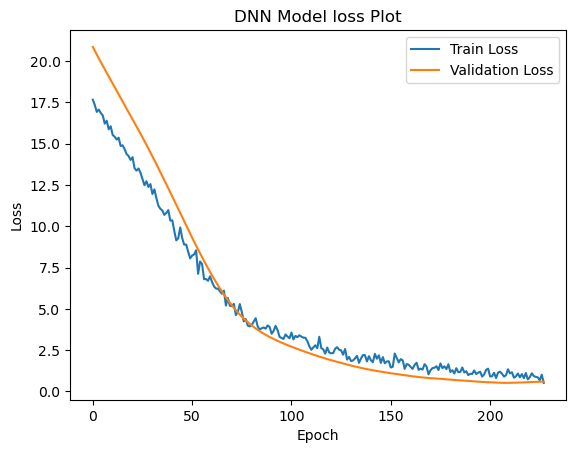

In [65]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('DNN Model loss Plot')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train Loss', 'Validation Loss'], loc='upper right')
plt.show()

In [66]:
y_pred=dnn_model.predict(X_test)
y_pred

1/1 [==============================] - 0s 43ms/step


array([[5.0463724, 7.519344 ],
       [5.731851 , 2.6968217],
       [1.4529486, 3.9486258],
       [2.1389527, 5.7623153],
       [4.660856 , 1.1188034],
       [3.954847 , 6.8002467],
       [2.5802963, 6.0944333],
       [4.384551 , 7.3882318],
       [4.9996524, 2.6070209],
       [3.551816 , 7.480253 ],
       [1.9039478, 1.4667493],
       [1.9252546, 0.4545015]], dtype=float32)

In [67]:
from sklearn.metrics import mean_squared_error
from math import sqrt

mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error (MSE) on new data in m: {:.2f}'.format(mse))

rmse=sqrt(mean_squared_error(y_test, y_pred)) 
print('Root Mean Squared Error (RMSE) on new data in m: {:.2f}'.format(rmse))

from sklearn.metrics import mean_absolute_percentage_error
print('Mean Absolute Percentage Error (MAPE) on new data in percentage is : {:.2f}'.format(mean_absolute_percentage_error(y_test,y_pred)*100))

print('R2 score is in percent: {:.2f}'.format(r2_score(y_test, y_pred)*100))

Mean Squared Error (MSE) on new data in m: 0.60
Root Mean Squared Error (RMSE) on new data in m: 0.77
Mean Absolute Percentage Error (MAPE) on new data in percentage is : 25.65
R2 score is in percent: 82.33


In [68]:
y_test=pd.DataFrame(y_test,columns=['x','y'])
y_pred=pd.DataFrame(y_pred, columns=['predicted_x','predicted_y'])

In [69]:
df_final = pd.DataFrame()
df_final = pd.concat([y_pred, y_test], axis=1)
df_final

,predicted_x,predicted_y,x,y
0,5.046372,7.519344,5,8
1,5.731851,2.696822,6,3
2,1.452949,3.948626,1,5
3,2.138953,5.762315,2,6
4,4.660856,1.118803,5,2
5,3.954847,6.800247,4,6
6,2.580296,6.094433,1,7
7,4.384551,7.388232,4,7
8,4.999652,2.607021,4,4
9,3.551816,7.480253,2,8


In [70]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from math import sqrt
# Define the model
model = RandomForestRegressor(random_state=42)

# Define the hyperparameters to search over
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [2, 4, 6, 8]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(y_pred, y_test)
# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Predict on new data with the best model
best_model = grid_search.best_estimator_
RF_pred = best_model.predict(y_pred)

# Calculate the mean squared error
mse = mean_squared_error(y_test, RF_pred)
print("Mean Squared Error in meter: {:.3f}" .format(mse))

rmse=sqrt(mean_squared_error(y_test, RF_pred)) 
print('Root Mean Squared Error (RMSE) on new data in meter: {:.3f}'.format(rmse))

from sklearn.metrics import mean_absolute_percentage_error
print('Mean Absolute Percentage Error (MAPE) on new data in percentage is : {:.3f}'.format(mean_absolute_percentage_error(y_test,RF_pred)*100))

print('R2 score is in percent: {:.2f}'.format(r2_score(y_test, RF_pred)*100))

Best Hyperparameters: {'max_depth': 4, 'n_estimators': 200}
Mean Squared Error in meter: 0.205
Root Mean Squared Error (RMSE) on new data in meter: 0.453
Mean Absolute Percentage Error (MAPE) on new data in percentage is : 15.056
R2 score is in percent: 93.39


In [71]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for the grid search
param_grid = {'n_neighbors': [3,5,7,9]}

# Create a KNN model
knn_model = KNeighborsRegressor()

# Perform a grid search using cross-validation
grid_search = GridSearchCV(knn_model, param_grid, cv=5)
grid_search.fit(y_pred, y_test)

# Print the best parameter value found by the grid search
print('Best K value found by grid search:', grid_search.best_params_['n_neighbors'])

# Get the predictions using the best K value
best_knn_model = grid_search.best_estimator_
knn_pred = best_knn_model.predict(y_pred)

# Calculate the evaluation metrics
mse = mean_squared_error(y_test, knn_pred)
print('Mean Squared Error (MSE) on new data in m: {:.2f}'.format(mse))
rmse=sqrt(mean_squared_error(y_test, knn_pred)) 
print('Root Mean Squared Error (RMSE) on new data in m: {:.2f}'.format(rmse))
from sklearn.metrics import mean_absolute_percentage_error
print('Mean Absolute Percentage Error (MAPE) on new data in percentage is : {:.2f}'.format(mean_absolute_percentage_error(y_test,knn_pred)*100))

print('R2 score is in percent: {:.2f}'.format(r2_score(y_test, knn_pred)*100))

Best K value found by grid search: 3
Mean Squared Error (MSE) on new data in m: 0.72
Root Mean Squared Error (RMSE) on new data in m: 0.85
Mean Absolute Percentage Error (MAPE) on new data in percentage is : 28.87
R2 score is in percent: 78.18


In [72]:
from tensorflow.keras.models import load_model

dnn_model.save('m3y_DNN_Regrr_model_xy.h5')


In [73]:
loaded_model = load_model('my_DNN_Regrr_model_xy.h5')
loaded_model

In [74]:
dfff=pd.read_csv('D:/testt.csv')

In [75]:
dfff

,AP1RTT,AP1STDEV,AP1RSS,AP2RTT,AP2STDEV,AP2RSS,AP3RTT,AP3STDEV,AP3RSS,x,y
0,7.973,2.040,-60.0,1.047,0.202,-47,10.413,2.050,-70,1,1
1,7.877,0.784,-61.0,1.077,0.106,-47,10.334,1.976,-70,1,1
2,7.789,1.449,-62.0,1.116,0.151,-47,10.374,1.926,-71,1,1
3,7.701,1.734,-62.0,0.999,0.126,-47,10.491,1.856,-70,1,1
4,7.818,2.059,-62.0,1.106,0.151,-47,10.530,1.908,-70,1,1
...,...,...,...,...,...,...,...,...,...,...,...
14286,7.232,0.465,-60.0,12.825,0.293,-72,0.491,0.989,-51,6,8
14287,6.969,1.224,-62.0,13.528,0.637,-71,0.569,0.938,-51,6,8
14288,6.764,2.843,-64.0,11.389,1.182,-69,0.608,0.874,-51,6,8
14289,6.241,0.865,-54.0,10.178,0.968,-67,0.373,1.017,-51,6,8


In [76]:
dfff.drop(['AP1RSS','AP2RSS','AP3RSS'],axis=1,inplace=True)

In [77]:
dffff=dfff.assign(Product_RTT=dfff['AP1RTT']*dfff['AP2RTT']*dfff['AP3RTT'],Product_RTT12=dfff['AP1RTT']*dfff['AP2RTT'],Product_RTT23=dfff['AP2RTT']*dfff['AP3RTT'],Product_RTT13=dfff['AP1RTT']*dfff['AP3RTT'],square_RTT1=dfff['AP1RTT']*dfff['AP1RTT'],square_RTT2=dfff['AP2RTT']*dfff['AP2RTT'],square_RTT3=dfff['AP3RTT']*dfff['AP3RTT'])


In [78]:
import pandas as pd

# Group the DataFrame by 'x' and 'y'
groups = dffff.groupby(['x', 'y'])

# Split the groups into two separate dataframes
df1 = pd.concat([group.iloc[:len(group) // 2] for _, group in groups])
df2 = pd.concat([group.iloc[len(group) // 2:] for _, group in groups])


In [79]:
new_name={'AP1RTT':'AP1RTTA','AP1STDEV':'AP1STDEVA','AP2RTT':'AP2RTTA','AP2STDEV':'AP2STDEVA','AP3RTT':'AP3RTTA','AP3STDEV':'AP3STDEVA','Product_RTT':'Product_RTTA','Product_RTT12':'Product_RTT12A','Product_RTT13':'Product_RTT13A','square_RTT1':'square_RTT1A','square_RTT2':'square_RTT2A','square_RTT3':'square_RTT3A'}
df1.rename(columns=new_name,inplace=True)

In [80]:
new_name={'AP1RTT':'AP1RTTB','AP1STDEV':'AP1STDEVB','AP2RTT':'AP2RTTB','AP2STDEV':'AP2STDEVB','AP3RTT':'AP3RTTB','AP3STDEV':'AP3STDEVB','Product_RTT':'Product_RTTB','Product_RTT12':'Product_RTT12B','Product_RTT13':'Product_RTT13B','square_RTT1':'square_RTT1B','square_RTT2':'square_RTT2B','square_RTT3':'square_RTT3B'}
df2.rename(columns=new_name,inplace=True)

In [81]:
# group the data by x and y values, and calculate the mean of each group
groupedd1 = df1.groupby(['x', 'y']).mean()
groupedd2 = df2.groupby(['x', 'y']).mean()

In [82]:
import numpy as np
import pandas as pd

# Group the data by 'x' and 'y', and calculate the minimum, maximum, 25th, 50th, and 75th percentiles for each column for local feature extractions
grouped = df1.groupby(['x', 'y']).agg(['min', 'max', lambda x: np.percentile(x, q=25), lambda x: np.percentile(x, q=50), lambda x: np.percentile(x, q=75)])

# Add the mean or average value of each column to the grouped dataframe
grouped_mean = df1.groupby(['x', 'y']).mean()
grouped = pd.concat([grouped, grouped_mean], axis=1)

# Rename the columns and reset the index
grouped.columns = ['_'.join(col).strip() for col in grouped.columns.values]
grouped = grouped.reset_index()

In [83]:
import numpy as np
import pandas as pd

# Group the data by 'x' and 'y', and calculate the minimum, maximum, 25th, 50th, and 75th percentiles for each column for local feature extractions
groupedd = df2.groupby(['x', 'y']).agg(['min', 'max', lambda x: np.percentile(x, q=25), lambda x: np.percentile(x, q=50), lambda x: np.percentile(x, q=75)])

# Add the mean or average value of each column to the grouped dataframe
grouped_mean = df2.groupby(['x', 'y']).mean()
groupedd = pd.concat([groupedd, grouped_mean], axis=1)

# Rename the columns and reset the index
groupedd.columns = ['_'.join(col).strip() for col in groupedd.columns.values]
groupedd = groupedd.reset_index()

In [84]:
new_name={'AP1RTTA_<lambda_0>': 'AP1RTTA_25','AP2RTTA_<lambda_0>': 'AP2RTTA_25','AP3RTTA_<lambda_0>': 'AP3RTTA_25',
          'AP1RTTA_<lambda_1>': 'AP1RTTA_50','AP2RTTA_<lambda_1>': 'AP2RTTA_50','AP3RTTA_<lambda_1>': 'AP3RTTA_50',
          'AP1RTTA_<lambda_2>': 'AP1RTTA_75','AP2RTTA_<lambda_2>': 'AP2RTTA_75','AP3RTTA_<lambda_2>': 'AP3RTTA_75',
           
             
          'AP1STDEVA_<lambda_0>':'AP1STDEVA_25','AP2STDEVA_<lambda_0>':'AP2STDEVA_25','AP3STDEVA_<lambda_0>':'AP3STDEVA_25',
          'AP1STDEVA_<lambda_1>':'AP1STDEVA_50','AP2STDEVA_<lambda_1>':'AP2STDEVA_50','AP3STDEVA_<lambda_1>':'AP3STDEVA_50',
          'AP1STDEVA_<lambda_2>':'AP1STDEVA_75','AP2STDEVA_<lambda_2>':'AP2STDEVA_75','AP3STDEVA_<lambda_2>':'AP3STDEVA_75',
          'A_P_1_R_T_T_A':'AP1RTTA_MEAN','A_P_2_R_T_T_A':'AP2RTTA_MEAN','A_P_3_R_T_T_A_A':'AP3RTTA_MEAN',
          'A_P_1_S_T_D_E_V_A':'AP1STDEVA_MEAN','A_P_2_S_T_D_E_V_A':'AP1STDEVA_MEAN','A_P_3_S_T_D_E_V_A':'AP1STDEVA_MEAN'}
grouped.rename(columns=new_name,inplace=True)

In [85]:
new_name={'AP1RTTB_<lambda_0>': 'AP1RTTB_25','AP2RTTB_<lambda_0>': 'AP2RTTB_25','AP3RTTB_<lambda_0>': 'AP3RTTB_25',
          'AP1RTTB_<lambda_1>': 'AP1RTTB_50','AP2RTTB_<lambda_1>': 'AP2RTTB_50','AP3RTTB_<lambda_1>': 'AP3RTTB_50',
          'AP1RTTB_<lambda_2>': 'AP1RTTB_75','AP2RTTB_<lambda_2>': 'AP2RTTB_75','AP3RTTB_<lambda_2>': 'AP3RTTB_75',
           
             
          'AP1STDEVB_<lambda_0>':'AP1STDEVB_25','AP2STDEVB_<lambda_0>':'AP2STDEVB_25','AP3STDEVB_<lambda_0>':'AP3STDEVB_25',
          'AP1STDEVB_<lambda_1>':'AP1STDEVB_50','AP2STDEVB_<lambda_1>':'AP2STDEVB_50','AP3STDEVB_<lambda_1>':'AP3STDEVB_50',
          'AP1STDEVB_<lambda_2>':'AP1STDEVB_75','AP2STDEVB_<lambda_2>':'AP2STDEVB_75','AP3STDEVB_<lambda_2>':'AP3STDEVB_75',
          'A_P_1_R_T_T_A':'AP1RTTA_MEAN','A_P_2_R_T_T_A':'AP2RTTA_MEAN','A_P_3_R_T_T_A_A':'AP3RTTA_MEAN',
          'A_P_1_S_T_D_E_V_A':'AP1STDEVA_MEAN','A_P_2_S_T_D_E_V_A':'AP1STDEVA_MEAN','A_P_3_S_T_D_E_V_A':'AP1STDEVA_MEAN'}
groupedd.rename(columns=new_name,inplace=True)

In [86]:
input_data=grouped.iloc[:,2:] 
output_data = grouped.iloc[:, :2]
first_df=grouped.iloc[:,2:] 
second_df=groupedd.iloc[:,2:] 
input_data = pd.concat([first_df, second_df], axis=1)
output_data = grouped.iloc[:, :2]

In [87]:
input_data=np.array(input_data.values)
output_data=np.array(output_data.values)

In [88]:
XX=input_data
yy=output_data
print(output_data.shape)
print(input_data.shape)

(39, 2)
(39, 156)


In [89]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
XX= sc.fit_transform(XX)

#X_val=sc.fit_transform(X_val)

In [90]:
y_predd=loaded_model.predict(XX)
y_predd

2/2 [==============================] - 0s 2ms/step


array([[1.3984106 , 1.2982297 ],
       [1.6716142 , 1.296515  ],
       [1.0637339 , 2.8766778 ],
       [0.97690684, 3.0097568 ],
       [1.250938  , 3.9373333 ],
       [2.0973608 , 6.5559273 ],
       [1.8867006 , 5.777377  ],
       [2.0321121 , 7.2323427 ],
       [1.8375334 , 1.2347283 ],
       [1.8567345 , 1.542125  ],
       [1.1981521 , 3.5053537 ],
       [1.4972656 , 4.458057  ],
       [1.8099351 , 5.1284003 ],
       [2.0029917 , 5.9850726 ],
       [2.1960754 , 6.3140807 ],
       [3.3673453 , 7.8116655 ],
       [2.9340754 , 0.87881905],
       [1.9447726 , 1.9767896 ],
       [2.2928996 , 2.8321996 ],
       [2.2869825 , 3.6607754 ],
       [3.2764006 , 7.8887343 ],
       [4.853221  , 1.0248324 ],
       [3.8233535 , 2.1374614 ],
       [4.1101665 , 1.7940953 ],
       [5.244769  , 3.4911835 ],
       [3.1890326 , 5.937493  ],
       [4.216     , 7.013414  ],
       [4.6466756 , 7.4738693 ],
       [5.0097194 , 7.972842  ],
       [5.4224343 , 1.3477807 ],
       [5.

In [91]:
from sklearn.metrics import mean_squared_error
from math import sqrt

mse = mean_squared_error(yy, y_predd)
print('Mean Squared Error (MSE) on new data in mm: {:.2f}'.format(mse))

rmse=sqrt(mean_squared_error(yy, y_predd)) 
print('Root Mean Squared Error (RMSE) on new data in mm: {:.2f}'.format(rmse))
from sklearn.metrics import mean_absolute_percentage_error
print('Mean Absolute Percentage Error (MAPE) on new data in percentage is : {:.2f}'.format(mean_absolute_percentage_error(yy,y_predd)*100))

#print('R2 score is in percent: {:.2f}'.format(r2_score(yy, y_predd)*100))

Mean Squared Error (MSE) on new data in mm: 0.39
Root Mean Squared Error (RMSE) on new data in mm: 0.62
Mean Absolute Percentage Error (MAPE) on new data in percentage is : 19.06


In [92]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from math import sqrt
from sklearn.metrics import r2_score

# Define the model
model = RandomForestRegressor(random_state=42)

# Define the hyperparameters to search over
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [2, 4, 6, 8]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(y_predd,yy)
# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Predict on new data with the best model
best_model = grid_search.best_estimator_
RF_pred = best_model.predict(y_predd)

# Calculate the mean squared error
mse = mean_squared_error(yy, RF_pred)
print("Mean Squared Error in meter: {:.3f}" .format(mse))

rmse=sqrt(mean_squared_error(yy, RF_pred)) 
print('Root Mean Squared Error (RMSE) on new data in meter: {:.3f}'.format(rmse))
from sklearn.metrics import mean_absolute_percentage_error
print('Mean Absolute Percentage Error (MAPE) on new data in percentage is : {:.2f}'.format(mean_absolute_percentage_error(yy,RF_pred)*100))


print('R2 score is in percent: {:.2f}'.format(r2_score(yy, RF_pred)*100))

Best Hyperparameters: {'max_depth': 6, 'n_estimators': 200}
Mean Squared Error in meter: 0.103
Root Mean Squared Error (RMSE) on new data in meter: 0.321
Mean Absolute Percentage Error (MAPE) on new data in percentage is : 11.00
R2 score is in percent: 97.33


In [54]:
yy=pd.DataFrame(yy,columns=['x','y'])
y_predd=pd.DataFrame(RF_pred, columns=['predicted_x','predicted_y'])

In [55]:
df_finall = pd.DataFrame()
df_finall = pd.concat([y_predd, yy], axis=1)
df_finall

,predicted_x,predicted_y,x,y
0,1.140000,1.322500,1,1
1,1.305000,1.692500,1,2
2,1.159167,3.136667,1,3
3,1.140000,3.561667,1,4
4,1.340000,4.327500,1,5
5,1.268417,6.494750,1,6
6,1.450000,6.506667,1,7
7,1.195000,7.630000,1,8
8,1.910000,1.270000,2,1
9,1.875000,1.784000,2,2


Text(0.5, 1.0, 'Predicted data scatter with test data ')

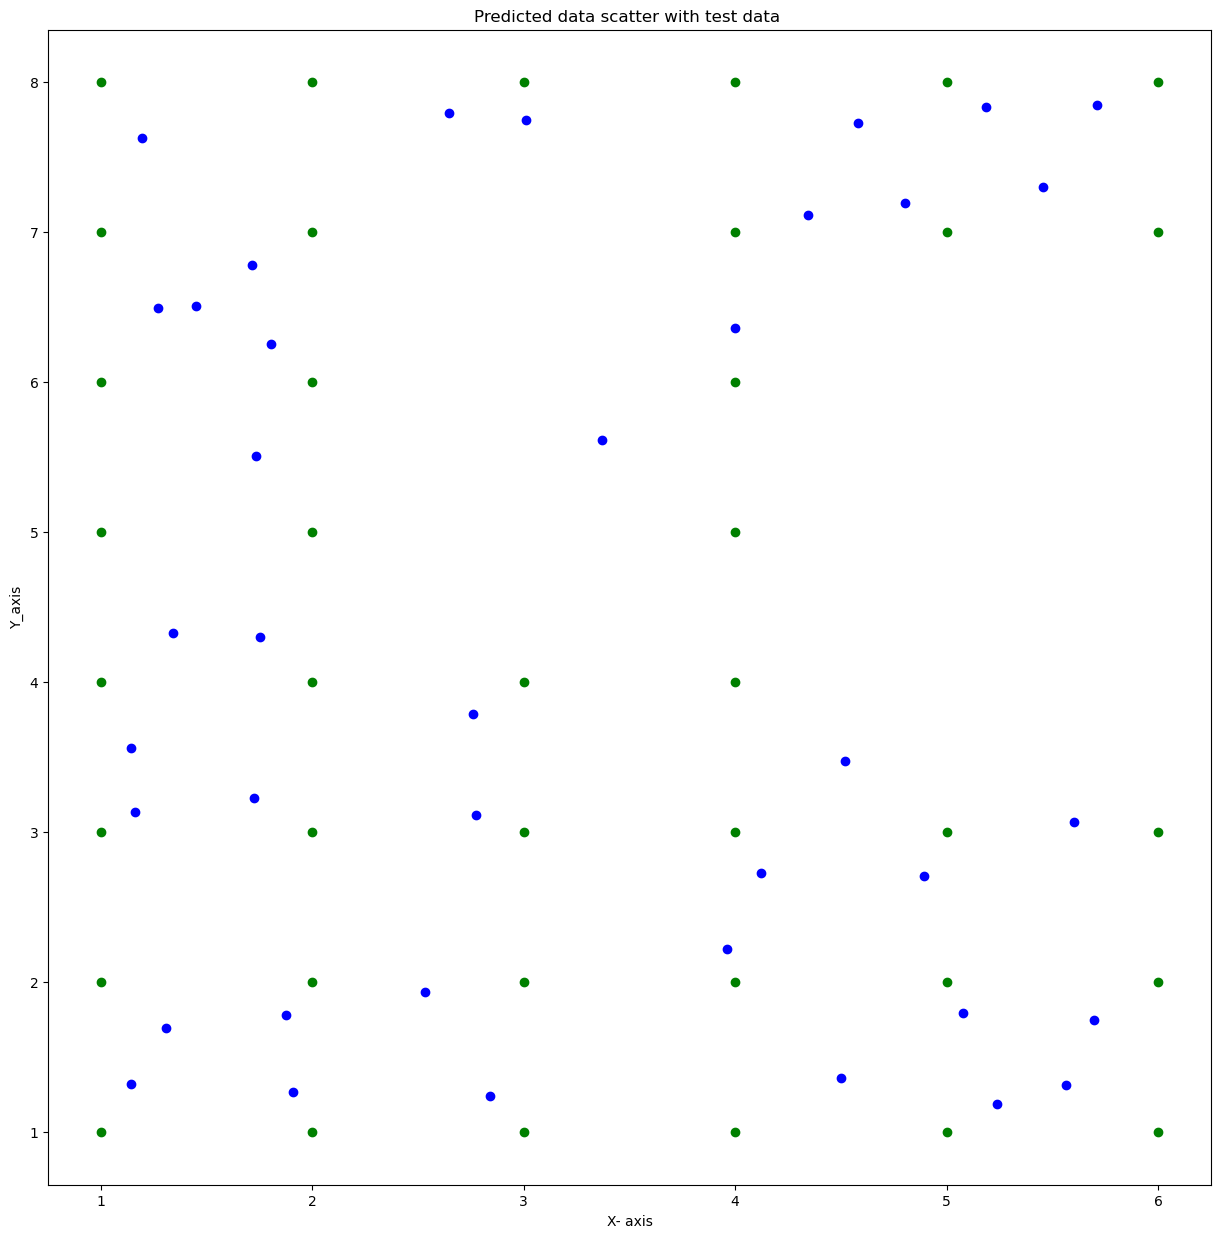

In [56]:
plt.figure(figsize=(15,15))
plt.scatter(df_finall['predicted_x'], df_finall['predicted_y'], color='blue')
plt.scatter(df_finall['x'], df_finall['y'], color='green')
plt.xlabel('X- axis')
plt.ylabel('Y_axis')
plt.title('Predicted data scatter with test data ')

In [57]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for the grid search
param_grid = {'n_neighbors': [3,5,7,9]}

# Create a KNN model
knn_model = KNeighborsRegressor()

# Perform a grid search using cross-validation
grid_search = GridSearchCV(knn_model, param_grid, cv=5)
grid_search.fit(y_predd, yy)

# Print the best parameter value found by the grid search
print('Best K value found by grid search:', grid_search.best_params_['n_neighbors'])

# Get the predictions using the best K value
best_knn_model = grid_search.best_estimator_
knn_pred = best_knn_model.predict(y_predd)

# Calculate the evaluation metrics
mse = mean_squared_error(yy, knn_pred)
print('Mean Squared Error (MSE) on new data in m: {:.2f}'.format(mse))
rmse=sqrt(mean_squared_error(yy, knn_pred)) 
print('Root Mean Squared Error (RMSE) on new data in m: {:.2f}'.format(rmse))
from sklearn.metrics import mean_absolute_percentage_error
print('Mean Absolute Percentage Error (MAPE) on new data in percentage is : {:.2f}'.format(mean_absolute_percentage_error(yy,knn_pred)*100))

print('R2 score is in percent: {:.2f}'.format(r2_score(yy, knn_pred)*100))

Best K value found by grid search: 3
Mean Squared Error (MSE) on new data in m: 0.20
Root Mean Squared Error (RMSE) on new data in m: 0.45
Mean Absolute Percentage Error (MAPE) on new data in percentage is : 15.32
R2 score is in percent: 94.93


In [58]:
from sklearn.model_selection import train_test_split
XX_train, XX_test, yy_train, yy_test = train_test_split(XX, yy, test_size = 0.3, random_state = 42)

In [59]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from math import sqrt
# Define the model
model = RandomForestRegressor(random_state=42)

# Define the hyperparameters to search over
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [2, 4, 6, 8]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(XX_train, yy_train)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Predict on new data with the best model
best_model = grid_search.best_estimator_
RF_pred = best_model.predict(XX_test)

# Calculate the mean squared error
mse = mean_squared_error(yy_test, RF_pred)
print("Mean Squared Error in meter: {:.3f}" .format(mse))

rmse=sqrt(mean_squared_error(yy_test, RF_pred)) 
print('Root Mean Squared Error (RMSE) on new data in meter: {:.3f}'.format(rmse))

from sklearn.metrics import mean_absolute_percentage_error
print('Mean Absolute Percentage Error (MAPE) on new data in percentage is : {:.2f}'.format(mean_absolute_percentage_error(yy_test,RF_pred)*100))

print('R2 score is in percent: {:.2f}'.format(r2_score(yy_test, RF_pred)*100))

Best Hyperparameters: {'max_depth': 8, 'n_estimators': 200}
Mean Squared Error in meter: 0.662
Root Mean Squared Error (RMSE) on new data in meter: 0.814
Mean Absolute Percentage Error (MAPE) on new data in percentage is : 27.99
R2 score is in percent: 81.74


In [60]:
from sklearn.neighbors import KNeighborsRegressor
from math import sqrt

# Define the parameter grid for the grid search
param_grid = {'n_neighbors': [3, 5, 7, 9]}

# Create a KNN model
knn_model = KNeighborsRegressor()

# Perform a grid search using cross-validation
grid_search = GridSearchCV(knn_model, param_grid, cv=5)
grid_search.fit(XX_train,yy_train)

# Print the best parameter value found by the grid search
print('Best K value found by grid search:', grid_search.best_params_['n_neighbors'])

# Get the predictions using the best K value
best_knn_model = grid_search.best_estimator_
knn_pred = best_knn_model.predict(XX_test)

# Calculate the evaluation metrics
mse = mean_squared_error(yy_test, knn_pred)
print('Mean Squared Error (MSE) on new data in m: {:.2f}'.format(mse))

rmse=sqrt(mean_squared_error(y_test, knn_pred)) 
print('Root Mean Squared Error (RMSE) on new data in m: {:.2f}'.format(rmse))

from sklearn.metrics import mean_absolute_percentage_error
print('Mean Absolute Percentage Error (MAPE) on new data in percentage is : {:.2f}'.format(mean_absolute_percentage_error(yy_test,knn_pred)*100))

print('R2 score is in percent: {:.2f}'.format(r2_score(yy_test, knn_pred)*100))

Best K value found by grid search: 3
Mean Squared Error (MSE) on new data in m: 0.96
Root Mean Squared Error (RMSE) on new data in m: 0.98
Mean Absolute Percentage Error (MAPE) on new data in percentage is : 33.52
R2 score is in percent: 77.78


In [61]:
#df_finall.to_csv('output_data.csv', index=False)